In [2]:
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
import joblib

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [3]:
train = joblib.load("clean_train_date")

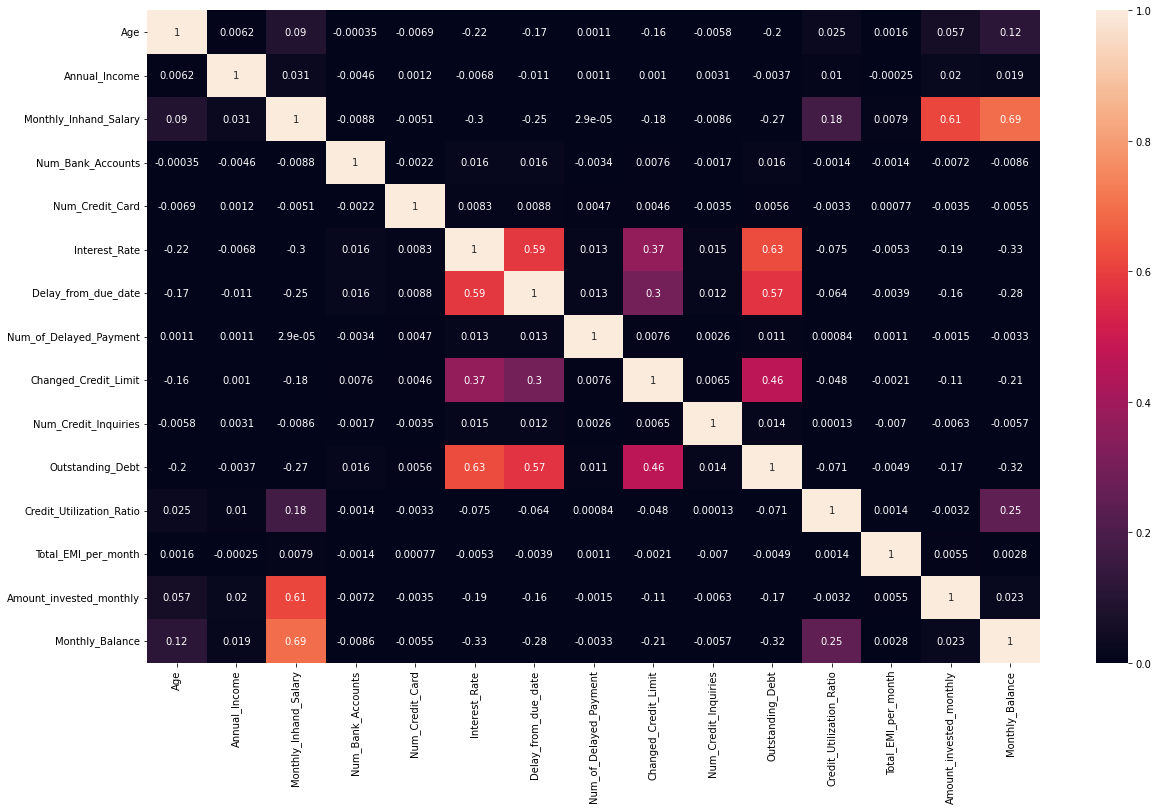

In [4]:
plt.figure(figsize=(20,12))
cor=train.corr()
sns.heatmap(cor,annot=True,vmin=0,vmax=1)
plt.show()

In [6]:
np.sum(train.isna())

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [8]:
train.head(10)

ID Customer_ID     Month             Name  Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January    Aaron Maashoh   23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February    Aaron Maashoh   23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March    Aaron Maashoh   23  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April    Aaron Maashoh   23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May    Aaron Maashoh   23  821-00-0265  Scientist   
5  0x1607   CUS_0xd40      June    Aaron Maashoh   23  821-00-0265  Scientist   
6  0x1608   CUS_0xd40      July    Aaron Maashoh   23  821-00-0265  Scientist   
7  0x1609   CUS_0xd40    August    Aaron Maashoh   23  821-00-0265  Scientist   
8  0x160e  CUS_0x21b1   January  Rick Rothackerj   28  004-07-5839    Teacher   
9  0x160f  CUS_0x21b1  February  Rick Rothackerj   28  004-07-5839    Teacher   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   
5       19114.12            1824.843333                3.0  ...        Good   
6       19114.12            1824.843333                3.0  ...        Good   
7       19114.12            1824.843333                3.0  ...        Good   
8       34847.84            3037.986667                2.0  ...        Good   
9       34847.84            3037.986667                2.0  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960  22 Years and 1 Months   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   
5            809.98                27.262259  22 Years and 6 Months   
6            809.98                22.537593  22 Years and 7 Months   
7            809.98                23.933795  22 Years and 1 Months   
8            605.03                24.464031  26 Years and 7 Months   
9            605.03                38.550848  26 Years and 8 Months   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                     No            49.574949                80.415295   
1                     No            49.574949               118.280222   
2                     No            49.574949                81.699521   
3                     No            49.574949               199.458074   
4                     No            49.574949                41.420153   
5                     No            49.574949                62.430172   
6                     No            49.574949               178.344067   
7                     No            49.574949                24.785217   
8                     No            18.816215               104.291825   
9                     No            18.816215                40.391238   

                  Payment_Behaviour Monthly_Balance  Credit_Score  
0   High_spent_Small_value_payments      312.494089          Good  
1    Low_spent_Large_value_payments      284.629162          Good  
2   Low_spent_Medium_value_payments      331.209863          Good  
3    Low_spent_Small_value_payments      223.451310          Good  
4  High_spent_Medium_value_payments      341.489231          Good  
5  High_spent_Medium_value_payments      340.479212          Good  
6    Low_spent_Small_value_payments      244.565317          Good  
7  High_spent_Medium_value_payments      358.124168      Standard  
8    Low_spent_Small_value_payments 

## Month

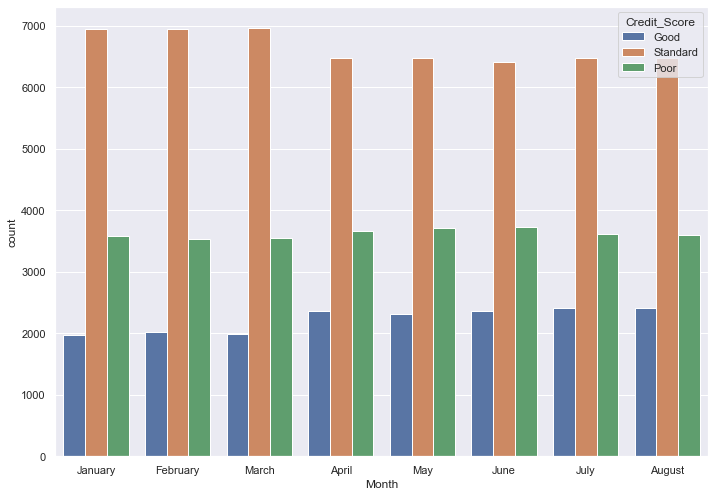

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x ='Month', hue = "Credit_Score", data = train)
plt.show()

## Age

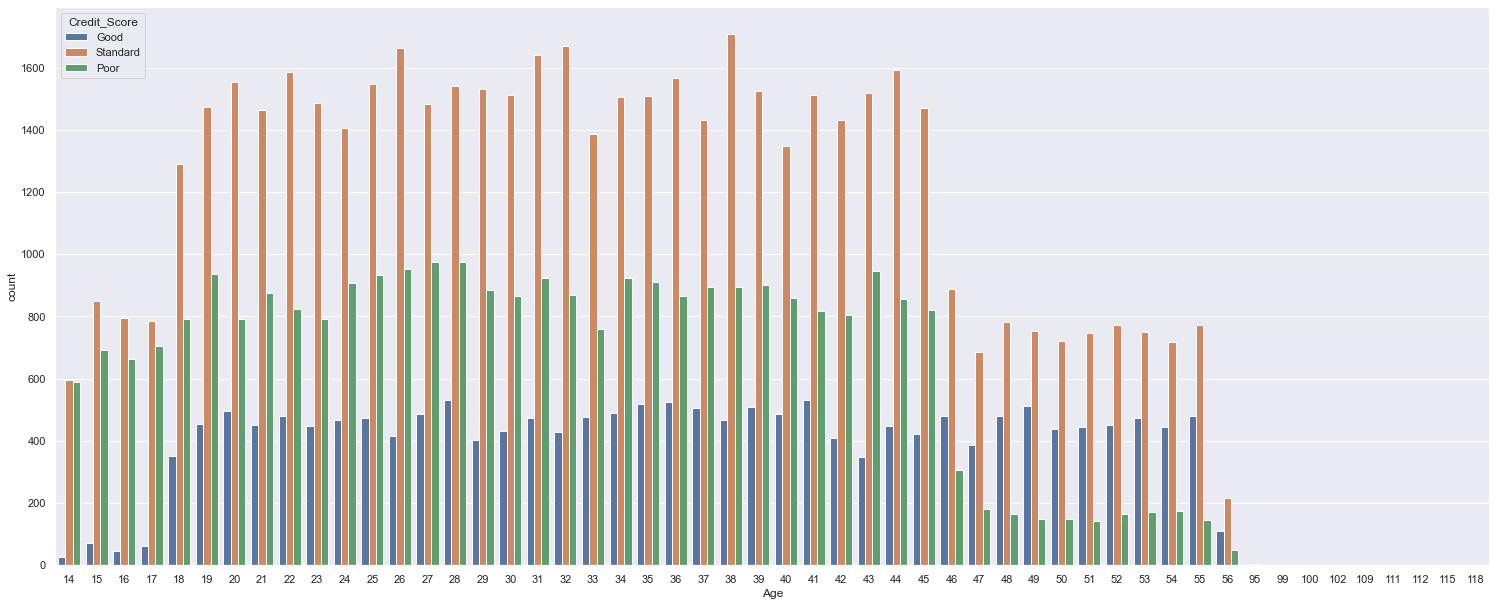

In [25]:
sns.set(rc={'figure.figsize':(25.7,10.27)})
sns.countplot(x ='Age', hue = "Credit_Score", data = train)
plt.show()

## Occupation

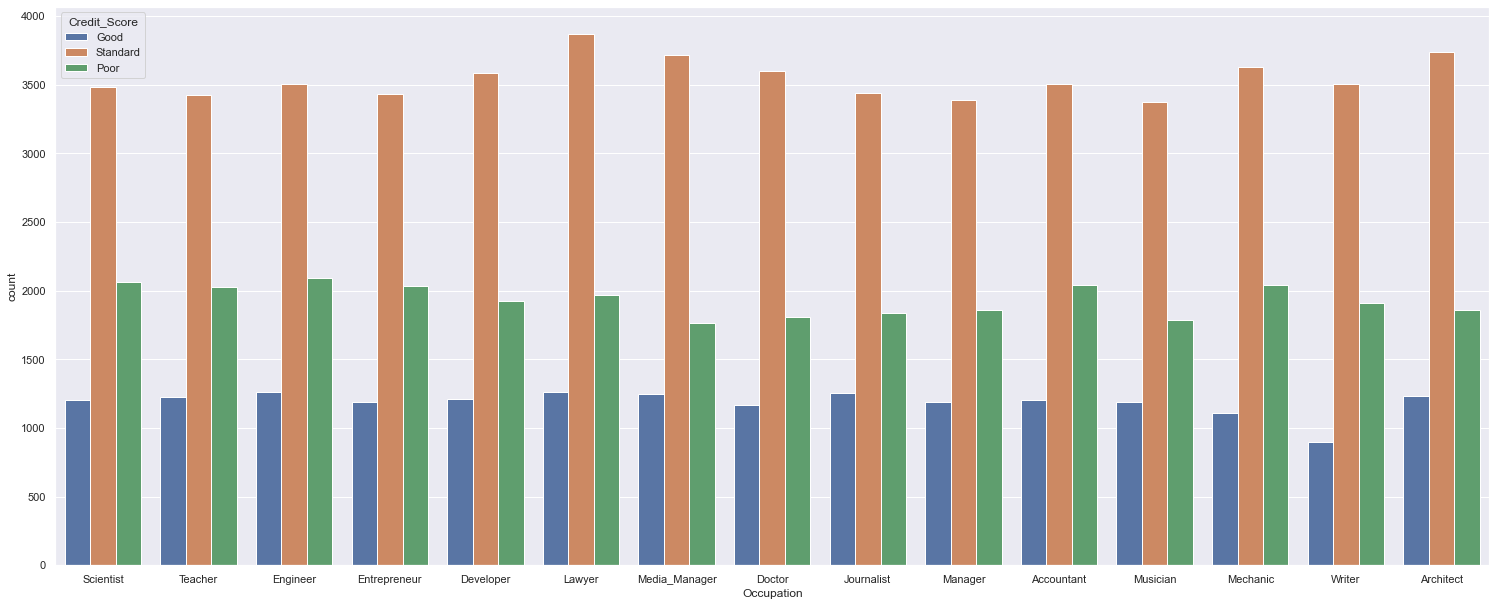

In [26]:
sns.set(rc={'figure.figsize':(25.7,10.27)})
sns.countplot(x ='Occupation', hue = "Credit_Score", data = train)
plt.show()

## Annual Income

<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

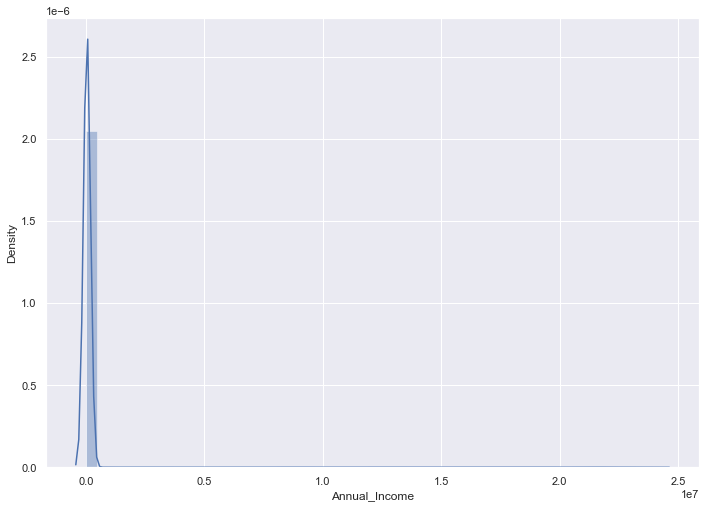

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train["Annual_Income"])

In [46]:
print(f"Annual_Income mean:{train['Annual_Income'].mean()}")
print(f"Annual_Income median:{train['Annual_Income'].median()}")
print(f"Annual_Income median:\n{train['Annual_Income'].mode()}")

Annual_Income mean:176415.70129814756
Annual_Income median:37578.61
Annual_Income median:
0      9141.63
1     17273.83
2     17816.75
3     20867.67
4     22434.16
5     32543.38
6     36585.12
7     40341.16
8    109945.32
dtype: float64


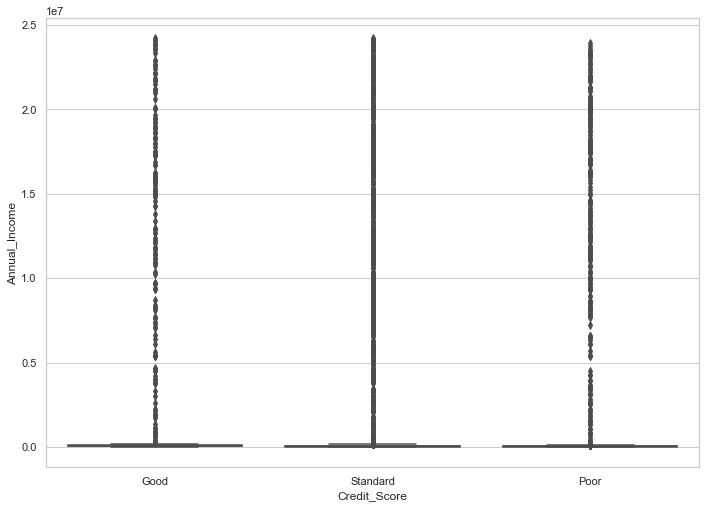

In [43]:
sns.boxplot(y=train['Annual_Income'], x=train['Credit_Score']) 
plt.show()

## Monthly Inhand salary

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Density'>

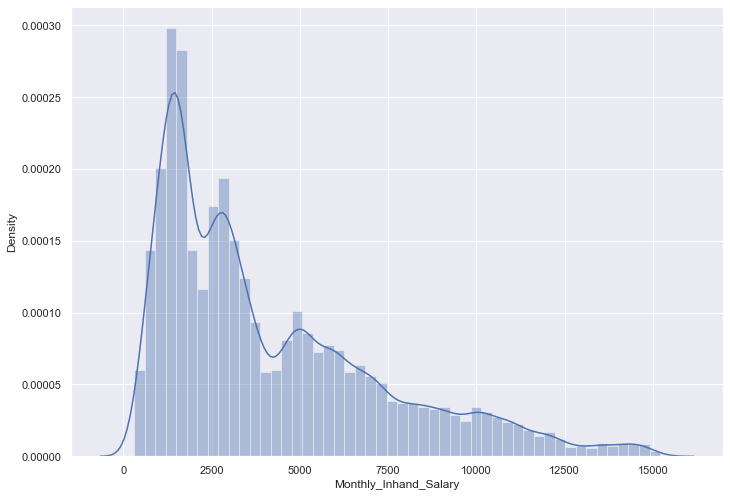

In [47]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train["Monthly_Inhand_Salary"])

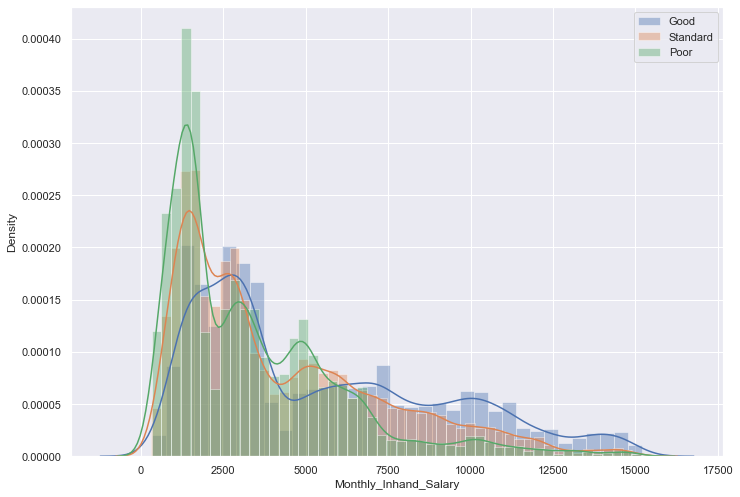

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train[train['Credit_Score']=='Good']["Monthly_Inhand_Salary"], label='Good')
sns.distplot(train[train['Credit_Score']=='Standard']["Monthly_Inhand_Salary"], label='Standard')
sns.distplot(train[train['Credit_Score']=='Poor']["Monthly_Inhand_Salary"], label='Poor')
plt.legend()

 ## No. of bank accnts

<AxesSubplot:xlabel='Num_Bank_Accounts', ylabel='Density'>

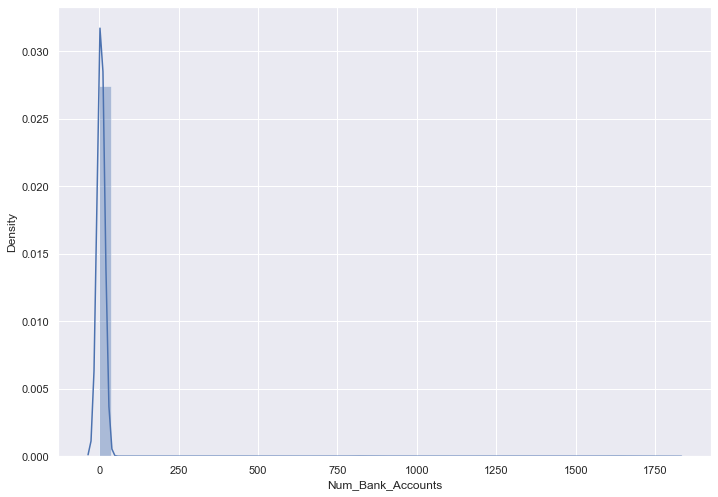

In [57]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train["Num_Bank_Accounts"])

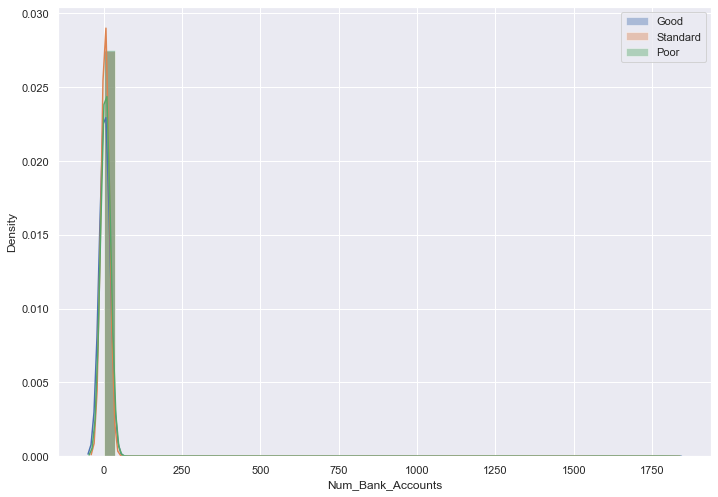

In [56]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train[train['Credit_Score']=='Good']["Num_Bank_Accounts"], label='Good')
sns.distplot(train[train['Credit_Score']=='Standard']["Num_Bank_Accounts"], label='Standard')
sns.distplot(train[train['Credit_Score']=='Poor']["Num_Bank_Accounts"], label='Poor')
plt.legend()

## Delay_from_due_date

In [ ]:
'Delay_from_due_date'

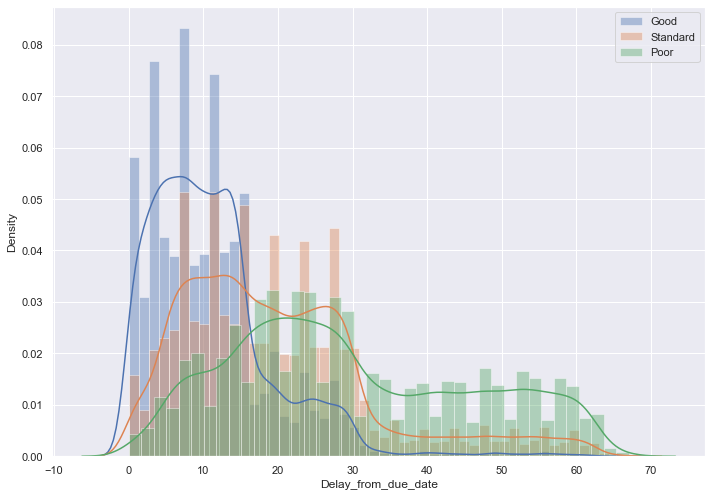

In [61]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train[train['Credit_Score']=='Good']["Delay_from_due_date"], label='Good')
sns.distplot(train[train['Credit_Score']=='Standard']["Delay_from_due_date"], label='Standard')
sns.distplot(train[train['Credit_Score']=='Poor']["Delay_from_due_date"], label='Poor')
plt.legend()

## Num_of_Delayed_Payment

In [81]:
%matplotlib inline
# %matplotlib qt5

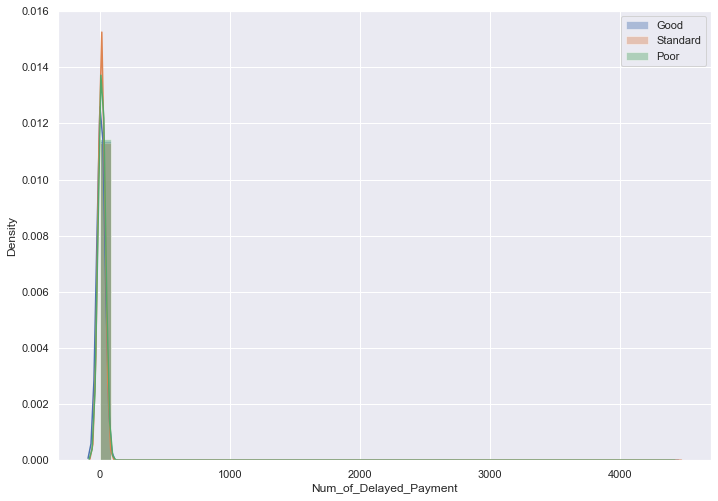

In [82]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train[train['Credit_Score']=='Good']["Num_of_Delayed_Payment"], label='Good')
sns.distplot(train[train['Credit_Score']=='Standard']["Num_of_Delayed_Payment"], label='Standard')
sns.distplot(train[train['Credit_Score']=='Poor']["Num_of_Delayed_Payment"], label='Poor')
plt.legend()

## Credit card limit

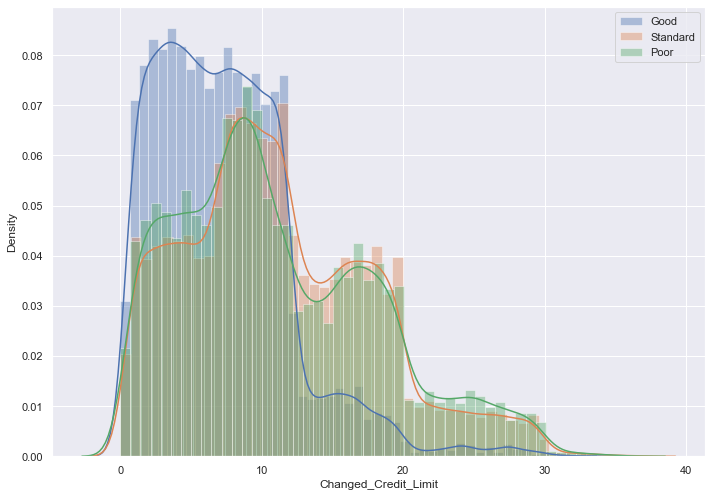

In [83]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train[train['Credit_Score']=='Good']["Changed_Credit_Limit"], label='Good')
sns.distplot(train[train['Credit_Score']=='Standard']["Changed_Credit_Limit"], label='Standard')
sns.distplot(train[train['Credit_Score']=='Poor']["Changed_Credit_Limit"], label='Poor')
plt.legend()

## Num_Credit_Inquiries

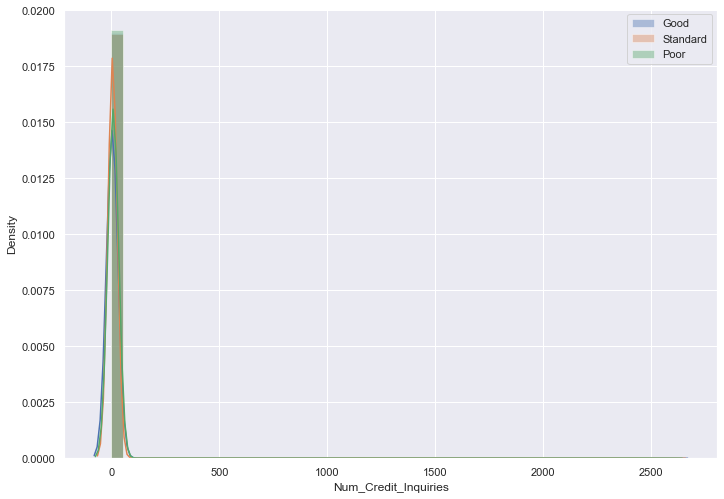

In [87]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train[train['Credit_Score']=='Good']["Num_Credit_Inquiries"], label='Good')
sns.distplot(train[train['Credit_Score']=='Standard']["Num_Credit_Inquiries"], label='Standard')
sns.distplot(train[train['Credit_Score']=='Poor']["Num_Credit_Inquiries"], label='Poor')
plt.legend()

## Credit_Mix

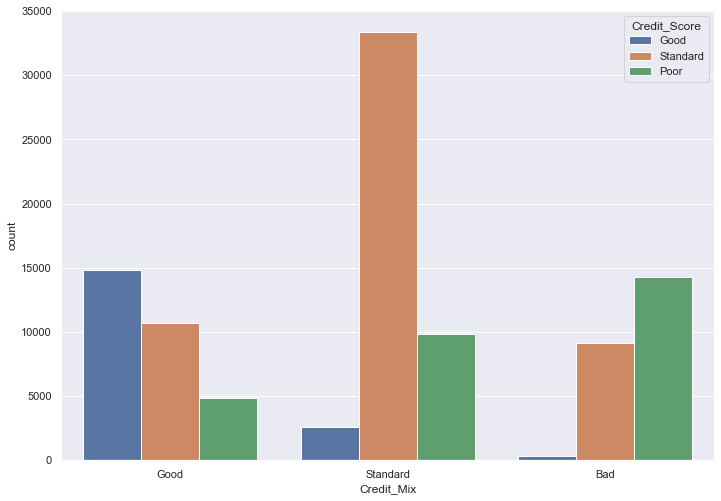

In [89]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x ='Credit_Mix', hue = "Credit_Score", data = train)
plt.show()

## Outstanding_debt

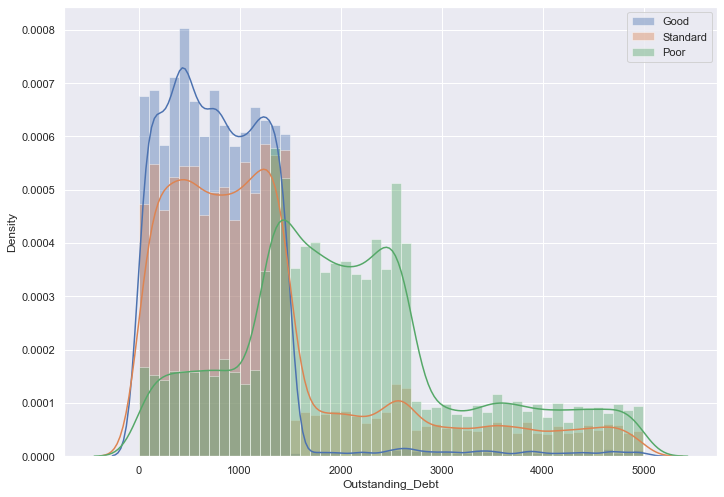

In [92]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train[train['Credit_Score']=='Good']["Outstanding_Debt"], label='Good')
sns.distplot(train[train['Credit_Score']=='Standard']["Outstanding_Debt"], label='Standard')
sns.distplot(train[train['Credit_Score']=='Poor']["Outstanding_Debt"], label='Poor')
plt.legend()

## Credit_Utilization_Ratio

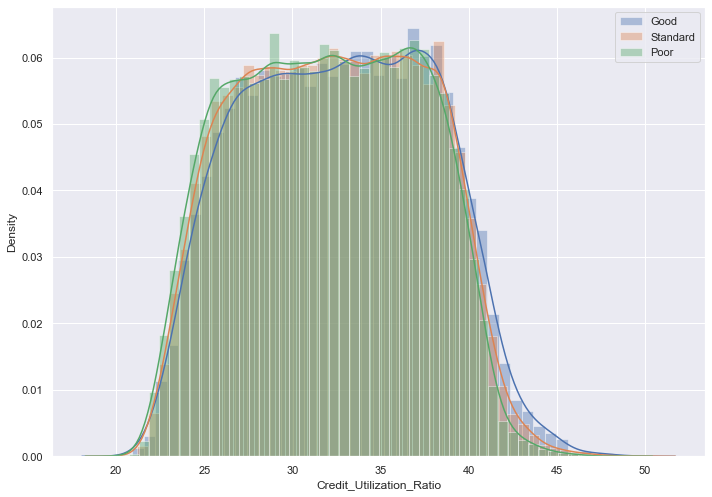

In [95]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train[train['Credit_Score']=='Good']["Credit_Utilization_Ratio"], label='Good')
sns.distplot(train[train['Credit_Score']=='Standard']["Credit_Utilization_Ratio"], label='Standard')
sns.distplot(train[train['Credit_Score']=='Poor']["Credit_Utilization_Ratio"], label='Poor')
plt.legend()

## Credit_History_Age


In [101]:
# Should be converted to days in the data preprocessing step

## Payment_of_Min_Amount

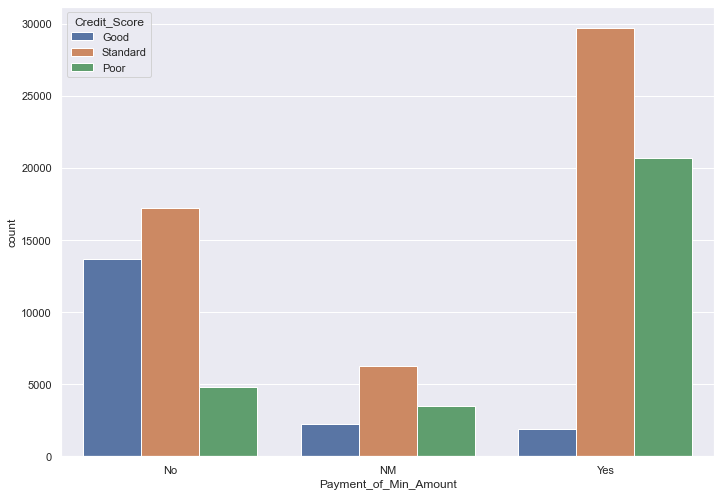

In [98]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x ='Payment_of_Min_Amount', hue = "Credit_Score", data = train)
plt.show()

## Total_EMI_per_month

<AxesSubplot:xlabel='Total_EMI_per_month', ylabel='Density'>

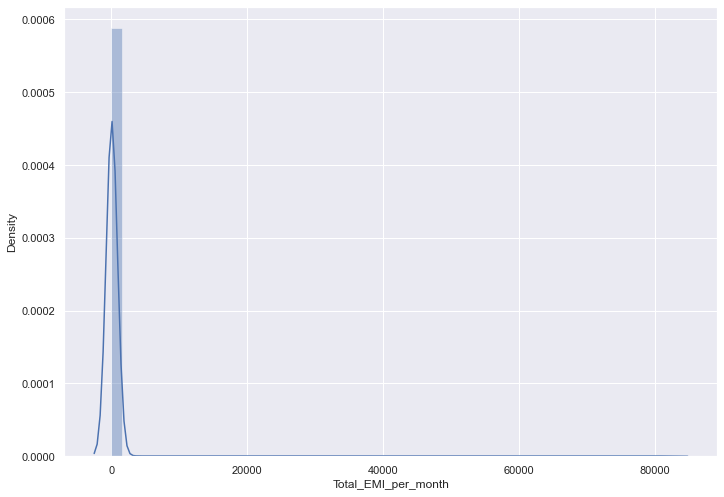

In [104]:
sns.distplot(train['Total_EMI_per_month'])

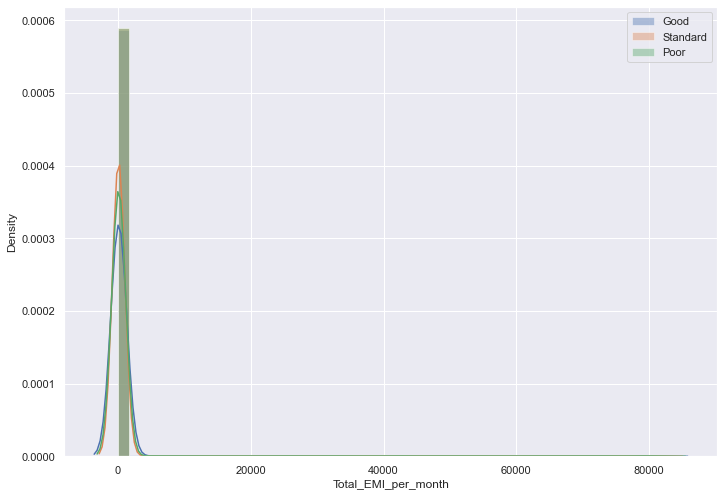

In [102]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train[train['Credit_Score']=='Good']["Total_EMI_per_month"], label='Good')
sns.distplot(train[train['Credit_Score']=='Standard']["Total_EMI_per_month"], label='Standard')
sns.distplot(train[train['Credit_Score']=='Poor']["Total_EMI_per_month"], label='Poor')
plt.legend()

## Amount_invested_monthly

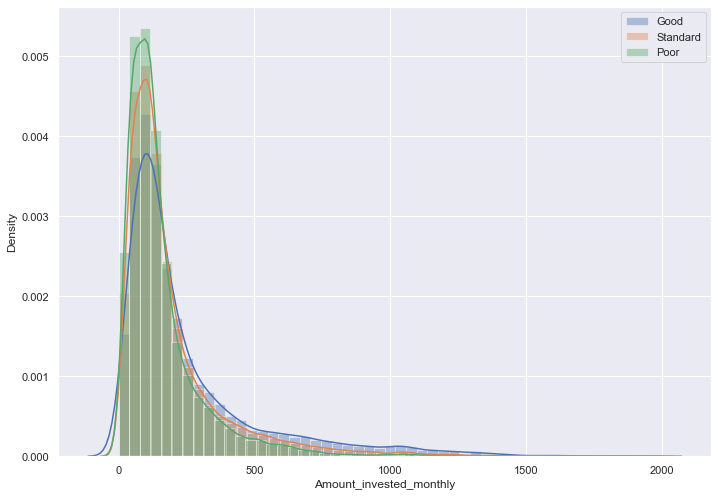

In [107]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train[train['Credit_Score']=='Good']["Amount_invested_monthly"], label='Good')
sns.distplot(train[train['Credit_Score']=='Standard']["Amount_invested_monthly"], label='Standard')
sns.distplot(train[train['Credit_Score']=='Poor']["Amount_invested_monthly"], label='Poor')
plt.legend()

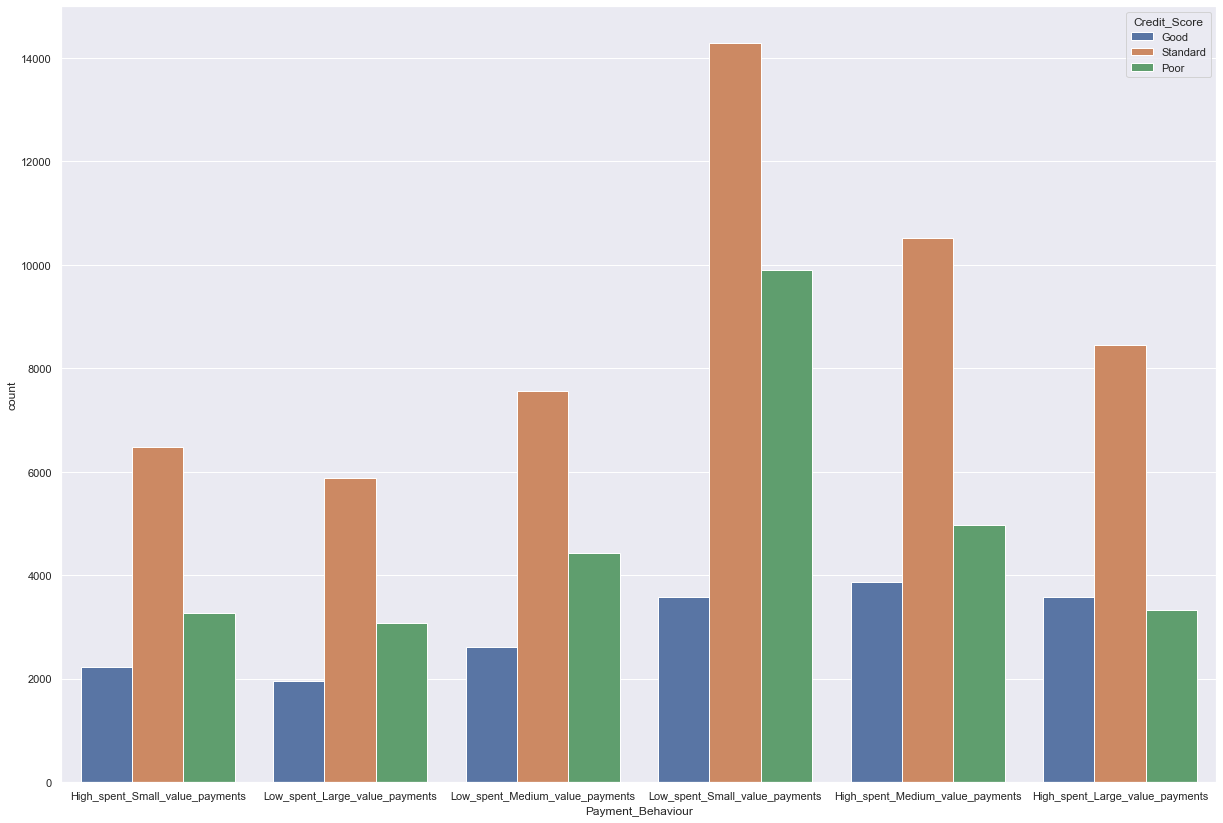

In [113]:
sns.set(rc={'figure.figsize':(20.7,14.27)})
sns.countplot(x ='Payment_Behaviour', hue = "Credit_Score", data = train)
plt.show()

 ## Monthly_Balance

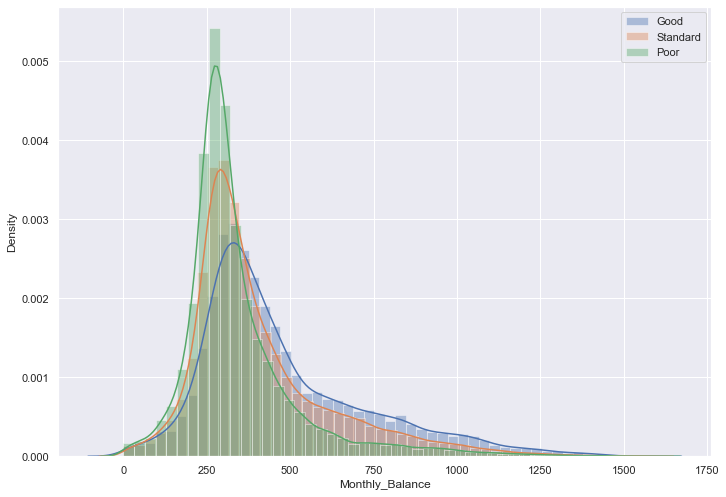

In [115]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train[train['Credit_Score']=='Good']["Monthly_Balance"], label='Good')
sns.distplot(train[train['Credit_Score']=='Standard']["Monthly_Balance"], label='Standard')
sns.distplot(train[train['Credit_Score']=='Poor']["Monthly_Balance"], label='Poor')
plt.legend()